In [1]:
import tile as tile_memmap
import mosaic as mosaic_memmap
import os
import matplotlib.pyplot as plt
import numpy as np
import tifffile
import rasterio
import re
import glob

tile_path = "C:\\Users\\chloe\\wolkovich_s24\\TreeRings\\code\\focus_testng\\jul12_almostfullcookie"
tile_path = "C:\\Users\\honey\\Downloads\\querob_jul16"
# tile_path = "C:\\Users\\honey\\Downloads\\4to9"

os.path.exists(tile_path)

c:\Users\honey\OneDrive\Desktop\stitch2d\stitch2d\mosaic.py:5: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr


True

In [2]:
# Define the directory containing the files
directory = tile_path

# Create a regex pattern to match the filenames and extract row and column numbers
pattern = re.compile(r'focused_(\d+)_(\d+)')

# List all files in the directory
files = os.listdir(directory)

# Filter and sort the files based on the row and column numbers
sorted_files = sorted(
    (f for f in files if pattern.match(f)),
    key=lambda f: (int(pattern.match(f).group(1)), int(pattern.match(f).group(2)))
)

# # Print the sorted list of files
# for file in sorted_files:
#     print(file)
print(len(sorted_files))


2550


In [5]:
# Create dats directory 
dats_path = "./dats"
if not os.path.exists(dats_path):
    os.mkdir("./dats")

memmaps = []
tiles = []
i = 0
for dir, _, files in os.walk(tile_path):
    for file in sorted_files:
        compressed_path = os.path.join(dir, file)
        dir_dat = "./dats/"
        with rasterio.open(compressed_path) as dataset:
            memmap_array = np.memmap(dir_dat + "{}_".format(i) + "memmap_array.dat", dtype=dataset.dtypes[0], mode='w+', shape=(dataset.height, dataset.width, dataset.count))
            i+=1
            inter = dataset.read()
            memmap_array[:] = np.transpose(inter, (1, 2, 0))
            memmaps.append(memmap_array)

        del dataset
        del memmap_array

            
        

In [6]:
tiles = []
for memmap in memmaps:
    tiles.append(tile_memmap.MemmapOpenCVTile(memmap))

#tiles_np = np.array(tiles).reshape((27, -1))

In [8]:

for i in range(len(tiles)):
    print("false") if not isinstance(tiles[i].imdata, np.memmap) else next

mosaic = mosaic_memmap.MemmapStructuredMosaic(tiles, dim=50)

In [9]:
mosaic.downsample(0.6)
mosaic.align()
mosaic.smooth_seams()

In [10]:
mosaic.save_params("params_5.json")

In [11]:
mosaic.save("this_doesnt_save.tiff")

def delete_dats(self):
    print("DELETING DATS")
    files = glob.glob('./dats/*')
    for file in files:
        os.remove(file)

    os.rmdir("./dats")

SAVING
In draw memmap tile count 1038
Saving large matrix of size: [16733, 21297, 3]
MemmapOpenCVTile saves an uncompressed .dat file. A custom viewer is likely needed.
DELETING DATS


PermissionError: [WinError 32] The process cannot access the file because it is being used by another process: './dats\\0_memmap_array.dat'

In [12]:
stitch = np.memmap("large_matrix_16733_21297_3.dat", dtype='uint8', mode='r', shape=(16733, 21297, 3))

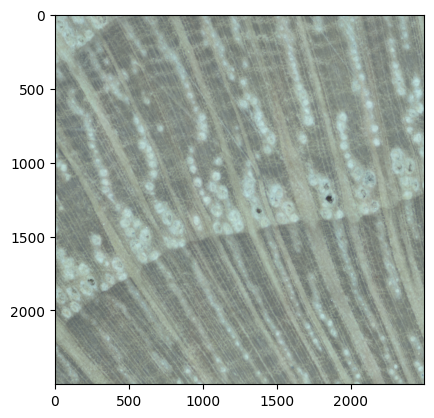

In [14]:
width = 2500         
height= 2500

tl_coord = (5000, 8000)

view = stitch[tl_coord[0]: tl_coord[0] + width, tl_coord[1]:tl_coord[1] + height]
plt.imshow(np.array(view))
plt.show()